In [339]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

read_shar_tack = pd.read_csv("shar_tack.csv", sep=',', encoding='latin-1')


In [321]:
useful_columns = ['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
                  'Sex', 'Age', 'Fatal (Y/N)', 'Time', 'Species']

new_shark_data = read_shar_tack[useful_columns]

In [340]:
new_shark_data

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Fatal (Y/N),Time,Species,Count
0,2018-06-25 00:00:00,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57.0,N,18h00,White shark,1
1,2018-06-18 00:00:00,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11.0,N,14h00 -15h00,None,1
2,2018-06-09 00:00:00,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48.0,N,07h45,None,1
3,2018-06-08 00:00:00,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,None,N,None,2 m shark,1
4,2018-06-04 00:00:00,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,M,None,N,None,"Tiger shark, 3m",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2803,None,0,Unprovoked,MOZAMBIQUE,Maputo Province,Santa Maria Peninsula,Skindiving,M,36.0,N,None,"""A pack of sharks""",1
2804,None,0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River,Fishing from a small boat & put his hand in th...,M,25.0,N,Afternoon,None,1
2805,None,0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River,Swimming naked near a date palm where many dat...,M,6.0,N,Afternoon,Bull shark,1
2806,None,0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River near Abu al Khasib,Swimming in section of river used for washing ...,M,16.0,N,Afternoon,Bull shark,1


In [322]:
new_shark_data['Count'] = 1

In [323]:
#Grafico de torta de la cantidad de paises donde hubo ataques

In [324]:
type_attack = new_shark_data[['Type', 'Count']]

In [325]:
#type_attack['Type'].unique()

In [326]:
type_attack_count = type_attack.groupby(['Type']).count()

In [327]:
type_attack_count = type_attack_count.sort_values('Count', ascending=False)['Count']

In [328]:
type_attack_count

Type
Unprovoked      2247
Provoked         277
Invalid          163
Boating           65
Boat              29
Sea Disaster      26
Questionable       1
Name: Count, dtype: int64

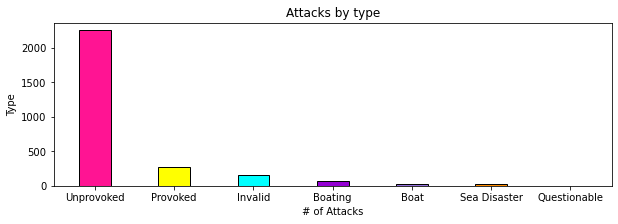

In [329]:


# dataset
count = type_attack_count.values
countries = type_attack_count.index
positions = range(len(count))
positions = [num * 2 for num in positions]

# plot bar graph
# plt.bar(positions, height, color=(1.0, 0.0, 0.0, 0.2))
plt.figure(figsize=(10, 3))
plt.bar(
	positions, 
	count, 
	color=('deeppink', 'yellow', 'aqua', 'darkviolet','mediumpurple','darkorange','lime','dodgerblue','gold','tomato'),
	edgecolor=('black'))

# replace axis label
plt.xticks(positions, countries)

plt.title('Attacks by type')

plt.xlabel('# of Attacks')
plt.ylabel('Type')

plt.show()

In [330]:
attacks_by_country = new_shark_data.groupby(['Country']).count()

In [331]:
attacks_by_country = attacks_by_country.sort_values('Count', ascending=False)['Count']

In [332]:
attacks_by_country[:10].index

Index(['USA', 'AUSTRALIA', 'SOUTH AFRICA', 'NEW ZEALAND', 'BRAZIL', 'BAHAMAS',
       'REUNION', 'MEXICO', 'PAPUA NEW GUINEA', 'ITALY'],
      dtype='object', name='Country')

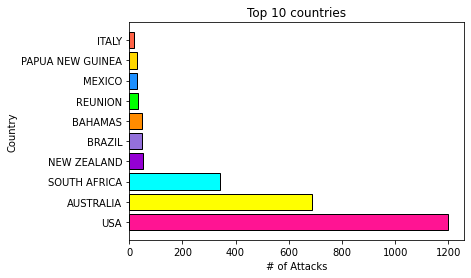

In [333]:
import matplotlib.pyplot as plt

# dataset
count = attacks_by_country[:10].values
countries = attacks_by_country[:10].index
positions = range(len(count))

# plot bar graph
# plt.bar(positions, height, color=(1.0, 0.0, 0.0, 0.2))
plt.barh(
	positions, 
	count, 
	color=('deeppink', 'yellow', 'aqua', 'darkviolet','mediumpurple','darkorange','lime','dodgerblue','gold','tomato'),
	edgecolor=('black'))

# replace axis label
plt.yticks(positions, countries)

plt.title('Top 10 countries')

plt.xlabel('# of Attacks')
plt.ylabel('Country')

plt.show()

In [334]:
maxs = read_shar_tack['Year'].max()

In [335]:
maxs

2018

In [336]:
attacks_by_year_df = new_shark_data[new_shark_data['Year'] > 2000]

In [337]:
attacks_by_year = attacks_by_year_df.groupby(['Year']).count()

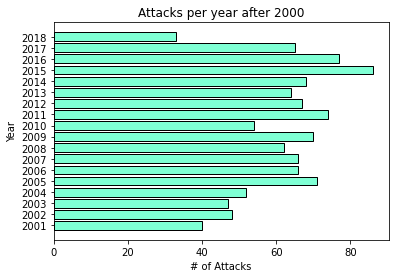

In [338]:
import matplotlib.pyplot as plt

# dataset
count = attacks_by_year['Count'].values
countries = attacks_by_year['Count'].index
positions = range(len(count))

# plot bar graph
# plt.bar(positions, height, color=(1.0, 0.0, 0.0, 0.2))
plt.barh(
	positions, 
	count, 
	color=('aquamarine'),
	edgecolor=('black'))

# replace axis label
plt.yticks(positions, countries)

plt.title('Attacks per year after 2000')

plt.xlabel('# of Attacks')
plt.ylabel('Year')

plt.show()